In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.calibration import calibration_curve
from itertools import cycle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/jong_su/merged_V2.csv')
data.head()

,image_filename,Nose_x,Nose_y,LEye_x,LEye_y,REye_x,REye_y,LEar_x,LEar_y,REar_x,...,RSmallToe_x,RSmallToe_y,LHeel_x,LHeel_y,RHeel_x,RHeel_y,gender,level,label,path
0,0.jpg,1368.317139,245.318161,1375.947510,242.774719,1368.317139,240.231262,1388.664673,245.318161,1386.121338,...,1355.599976,464.054596,1383.577881,456.424255,1386.121338,456.424255,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
1,1.jpg,1367.379517,245.956863,1375.112671,240.801453,1367.379517,240.801453,1388.001221,245.956863,1385.423462,...,1354.490967,462.483887,1385.423462,457.328491,1385.423462,457.328491,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
2,2.jpg,1365.833862,248.601212,1373.505005,243.487152,1365.833862,243.487152,1386.290161,246.044174,1383.733032,...,1355.605835,463.391479,1381.176025,458.277435,1388.847168,455.720398,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
3,3.jpg,1365.026855,247.695007,1372.763184,242.537491,1365.026855,242.537491,1385.656982,247.695007,1380.499390,...,1354.711914,464.310516,1380.499390,459.152985,1388.235718,456.574249,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
4,4.jpg,1362.091553,247.426620,1369.815674,242.277222,1364.666260,239.702530,1382.689209,247.426620,1380.114502,...,1354.367432,463.701385,1387.838623,458.551971,1387.838623,455.977264,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...


In [ ]:
data = data.drop('image_filename', axis=1)
data.head()

,Nose_x,Nose_y,LEye_x,LEye_y,REye_x,REye_y,LEar_x,LEar_y,REar_x,REar_y,...,RSmallToe_x,RSmallToe_y,LHeel_x,LHeel_y,RHeel_x,RHeel_y,gender,level,label,path
0,1368.317139,245.318161,1375.947510,242.774719,1368.317139,240.231262,1388.664673,245.318161,1386.121338,245.318161,...,1355.599976,464.054596,1383.577881,456.424255,1386.121338,456.424255,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
1,1367.379517,245.956863,1375.112671,240.801453,1367.379517,240.801453,1388.001221,245.956863,1385.423462,245.956863,...,1354.490967,462.483887,1385.423462,457.328491,1385.423462,457.328491,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
2,1365.833862,248.601212,1373.505005,243.487152,1365.833862,243.487152,1386.290161,246.044174,1383.733032,246.044174,...,1355.605835,463.391479,1381.176025,458.277435,1388.847168,455.720398,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
3,1365.026855,247.695007,1372.763184,242.537491,1365.026855,242.537491,1385.656982,247.695007,1380.499390,245.116257,...,1354.711914,464.310516,1380.499390,459.152985,1388.235718,456.574249,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...
4,1362.091553,247.426620,1369.815674,242.277222,1364.666260,239.702530,1382.689209,247.426620,1380.114502,247.426620,...,1354.367432,463.701385,1387.838623,458.551971,1387.838623,455.977264,0,1,Jump,Jump/1F(Flip)/넘어짐/고급/FA10/1/camera0/video/Moti...


In [ ]:
df = data

In [ ]:
X = data.drop(['label', 'level','gender', 'path'] , axis=1)
Y = data['label']

print(X.shape)
print(Y.shape)

(10196123, 52)
(10196123,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(6525518, 52)
(2039225, 52)
(6525518,)
(2039225,)
(1631380, 52)
(1631380,)


In [ ]:
model = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

In [ ]:
fold = KFold(n_splits=5, shuffle=False)
cv_scores = cross_val_score(model, X_train, Y_train, cv=fold, scoring='accuracy')
print("\n=== Cross-validation Scores ===")
print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 5. 최종 모델 훈련
print("\n=== Training Final Model ===")
model.fit(X_train, Y_train)
print("Model training completed!")

# 6. 훈련 세트 성능 평가
Y_train_pred = model.predict(X_train)
print("\n=== Training Set Performance ===")
print(classification_report(Y_train, Y_train_pred))

# 검증 세트 성능 평가
Y_val_pred = model.predict(X_val)
print("\n=== Validation Set Performance ===")
print(classification_report(Y_val, Y_val_pred))

# 7. 테스트 세트 성능 평가
Y_test_pred = model.predict(X_test)
Y_test_pred_proba = model.predict_proba(X_test)
print("\n=== Test Set Performance ===")
print(classification_report(Y_test, Y_test_pred))


=== Cross-validation Scores ===
CV Accuracy: 0.883 (+/- 0.000)

=== Training Final Model ===
Model training completed!

=== Training Set Performance ===
              precision    recall  f1-score   support

        Jump       1.00      1.00      1.00   2947537
        Spin       1.00      1.00      1.00   2102274
        Step       1.00      1.00      1.00   1475707

    accuracy                           1.00   6525518
   macro avg       1.00      1.00      1.00   6525518
weighted avg       1.00      1.00      1.00   6525518


=== Validation Set Performance ===
              precision    recall  f1-score   support

        Jump       0.89      0.93      0.91    736885
        Spin       0.89      0.89      0.89    525568
        Step       0.92      0.85      0.88    368927

    accuracy                           0.90   1631380
   macro avg       0.90      0.89      0.89   1631380
weighted avg       0.90      0.90      0.90   1631380


=== Test Set Performance ===
              prec


=== Confusion Matrix ===


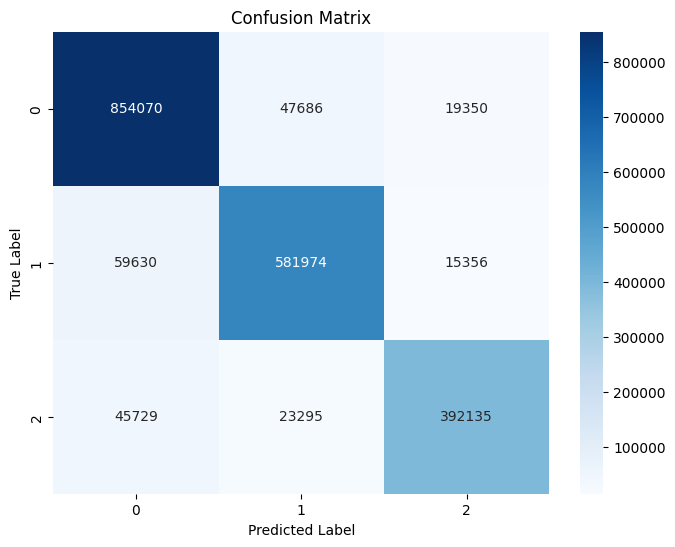

In [ ]:
# 5. 혼동 행렬 시각화
print("\n=== Confusion Matrix ===")
Y_test_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<ipython-input-12-8f06ac324655>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")


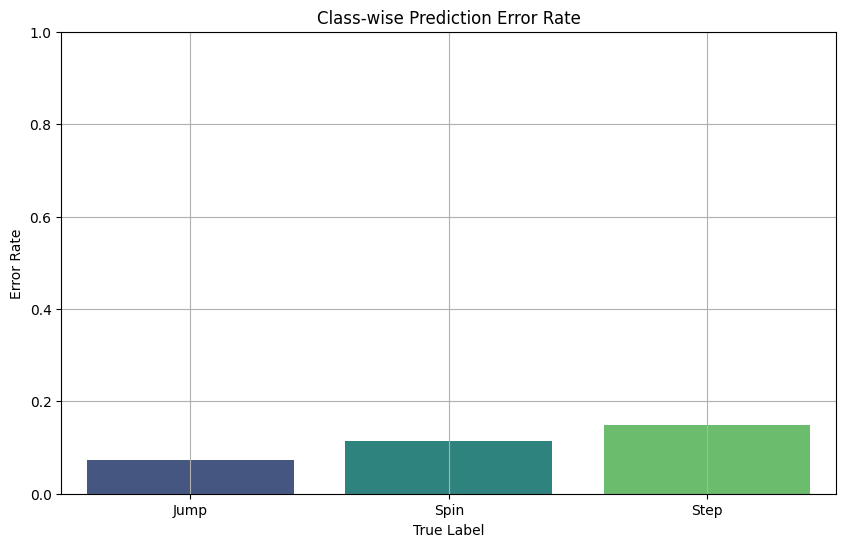


=== Class-wise Prediction Error Rate ===
True Label
Jump    0.072778
Spin    0.114141
Step    0.149675
Name: Error, dtype: float64


In [ ]:
# 예측값과 실제값의 차이 분석
error = pd.DataFrame({
    "True Label": Y_test,
    "Predicted Label": Y_test_pred
})

error["Error"] = (error["True Label"] != error["Predicted Label"]).astype(int)

# 클래스별 오류 비율 계산
classwise_error = error.groupby("True Label")["Error"].mean()

# 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=classwise_error.index, y=classwise_error.values, palette="viridis")
plt.title("Class-wise Prediction Error Rate")
plt.xlabel("True Label")
plt.ylabel("Error Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

print("\n=== Class-wise Prediction Error Rate ===")
print(classwise_error)


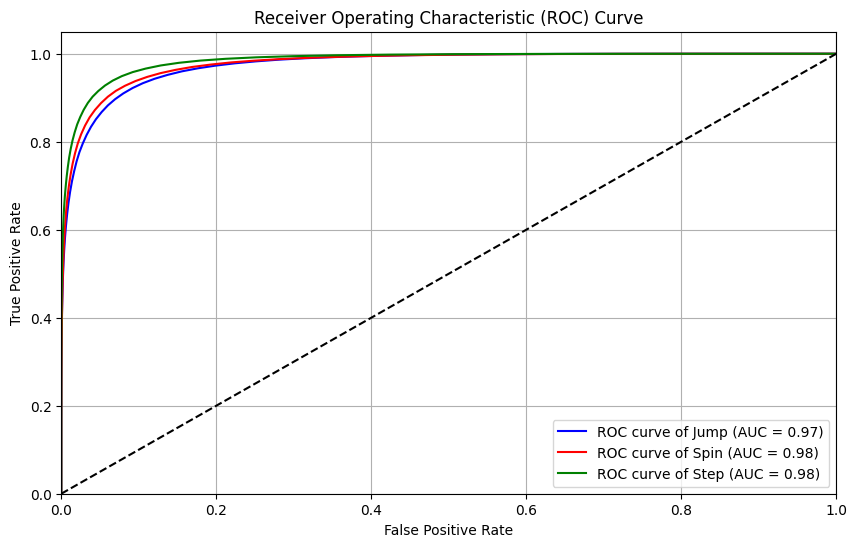

In [ ]:
# 1. ROC 커브
plt.figure(figsize=(10, 6))
y_pred_proba = model.predict_proba(X_test)
n_classes = len(np.unique(Y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(np.unique(Y)):
    fpr[i], tpr[i], _ = roc_curve(
        (Y_test == class_name).astype(int),
        y_pred_proba[:, i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])
for i, (color, class_name) in enumerate(zip(colors, np.unique(Y))):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label=f'ROC curve of {class_name} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

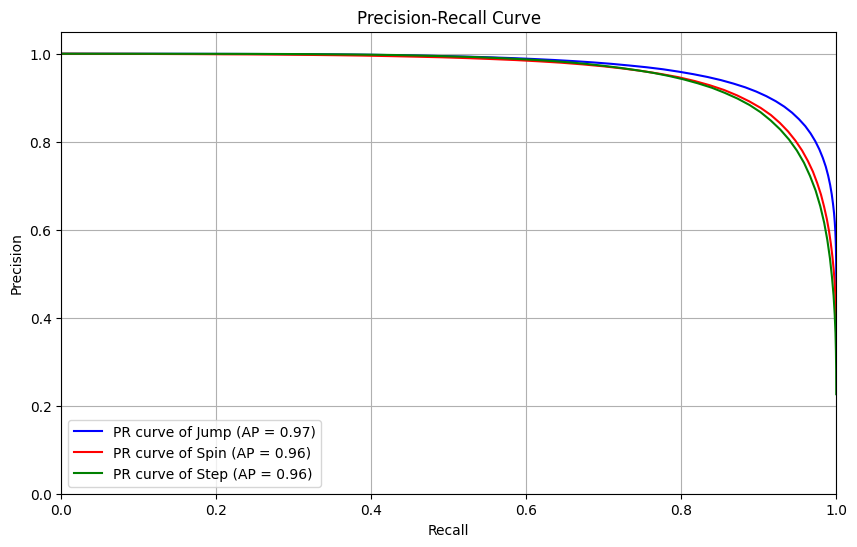


ROC AUC Scores:
Jump: 0.975
Spin: 0.978
Step: 0.985

Average Precision Scores:
Jump: 0.969
Spin: 0.957
Step: 0.955


In [ ]:
# 2. PR 커브
plt.figure(figsize=(10, 6))
precision = dict()
recall = dict()
avg_precision = dict()

for i, class_name in enumerate(np.unique(Y)):
    precision[i], recall[i], _ = precision_recall_curve(
        (Y_test == class_name).astype(int),
        y_pred_proba[:, i]
    )
    avg_precision[i] = average_precision_score(
        (Y_test == class_name).astype(int),
        y_pred_proba[:, i]
    )

colors = cycle(['blue', 'red', 'green'])
for i, (color, class_name) in enumerate(zip(colors, np.unique(Y))):
    plt.plot(
        recall[i],
        precision[i],
        color=color,
        label=f'PR curve of {class_name} (AP = {avg_precision[i]:.2f})'
    )

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# 3. 성능 지표 출력
print("\nROC AUC Scores:")
for i, class_name in enumerate(np.unique(Y)):
    print(f"{class_name}: {roc_auc[i]:.3f}")

print("\nAverage Precision Scores:")
for i, class_name in enumerate(np.unique(Y)):
    print(f"{class_name}: {avg_precision[i]:.3f}")

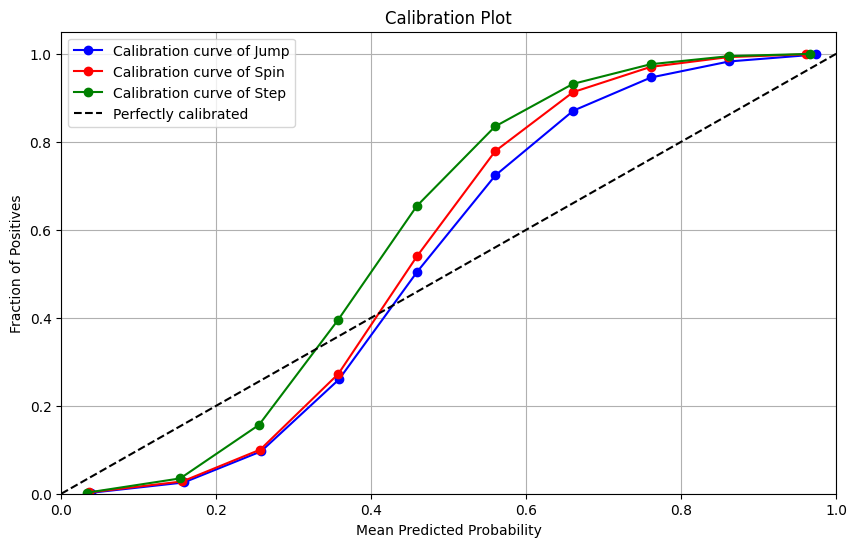

In [ ]:
plt.figure(figsize=(10, 6))
n_classes = len(np.unique(Y))
prob_true = dict()
prob_pred = dict()
calibration_scores = dict()

colors = cycle(['blue', 'red', 'green'])
for i, (color, class_name) in enumerate(zip(colors, np.unique(Y))):
    prob_true[i], prob_pred[i] = calibration_curve(
        (Y_test == class_name).astype(int),
        y_pred_proba[:, i],
        n_bins=10
    )
    # Calibration curve plot
    plt.plot(
        prob_pred[i],
        prob_true[i],
        marker='o',
        color=color,
        label=f'Calibration curve of {class_name}'
    )
    # 신뢰도 계산 (절대 오차의 평균)
    calibration_scores[class_name] = np.mean(np.abs(prob_true[i] - prob_pred[i]))

# 완벽히 보정된 모델 기준선 추가
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend(loc="best")
plt.grid(True)
plt.show()



<ipython-input-16-430a1f0a90ff>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


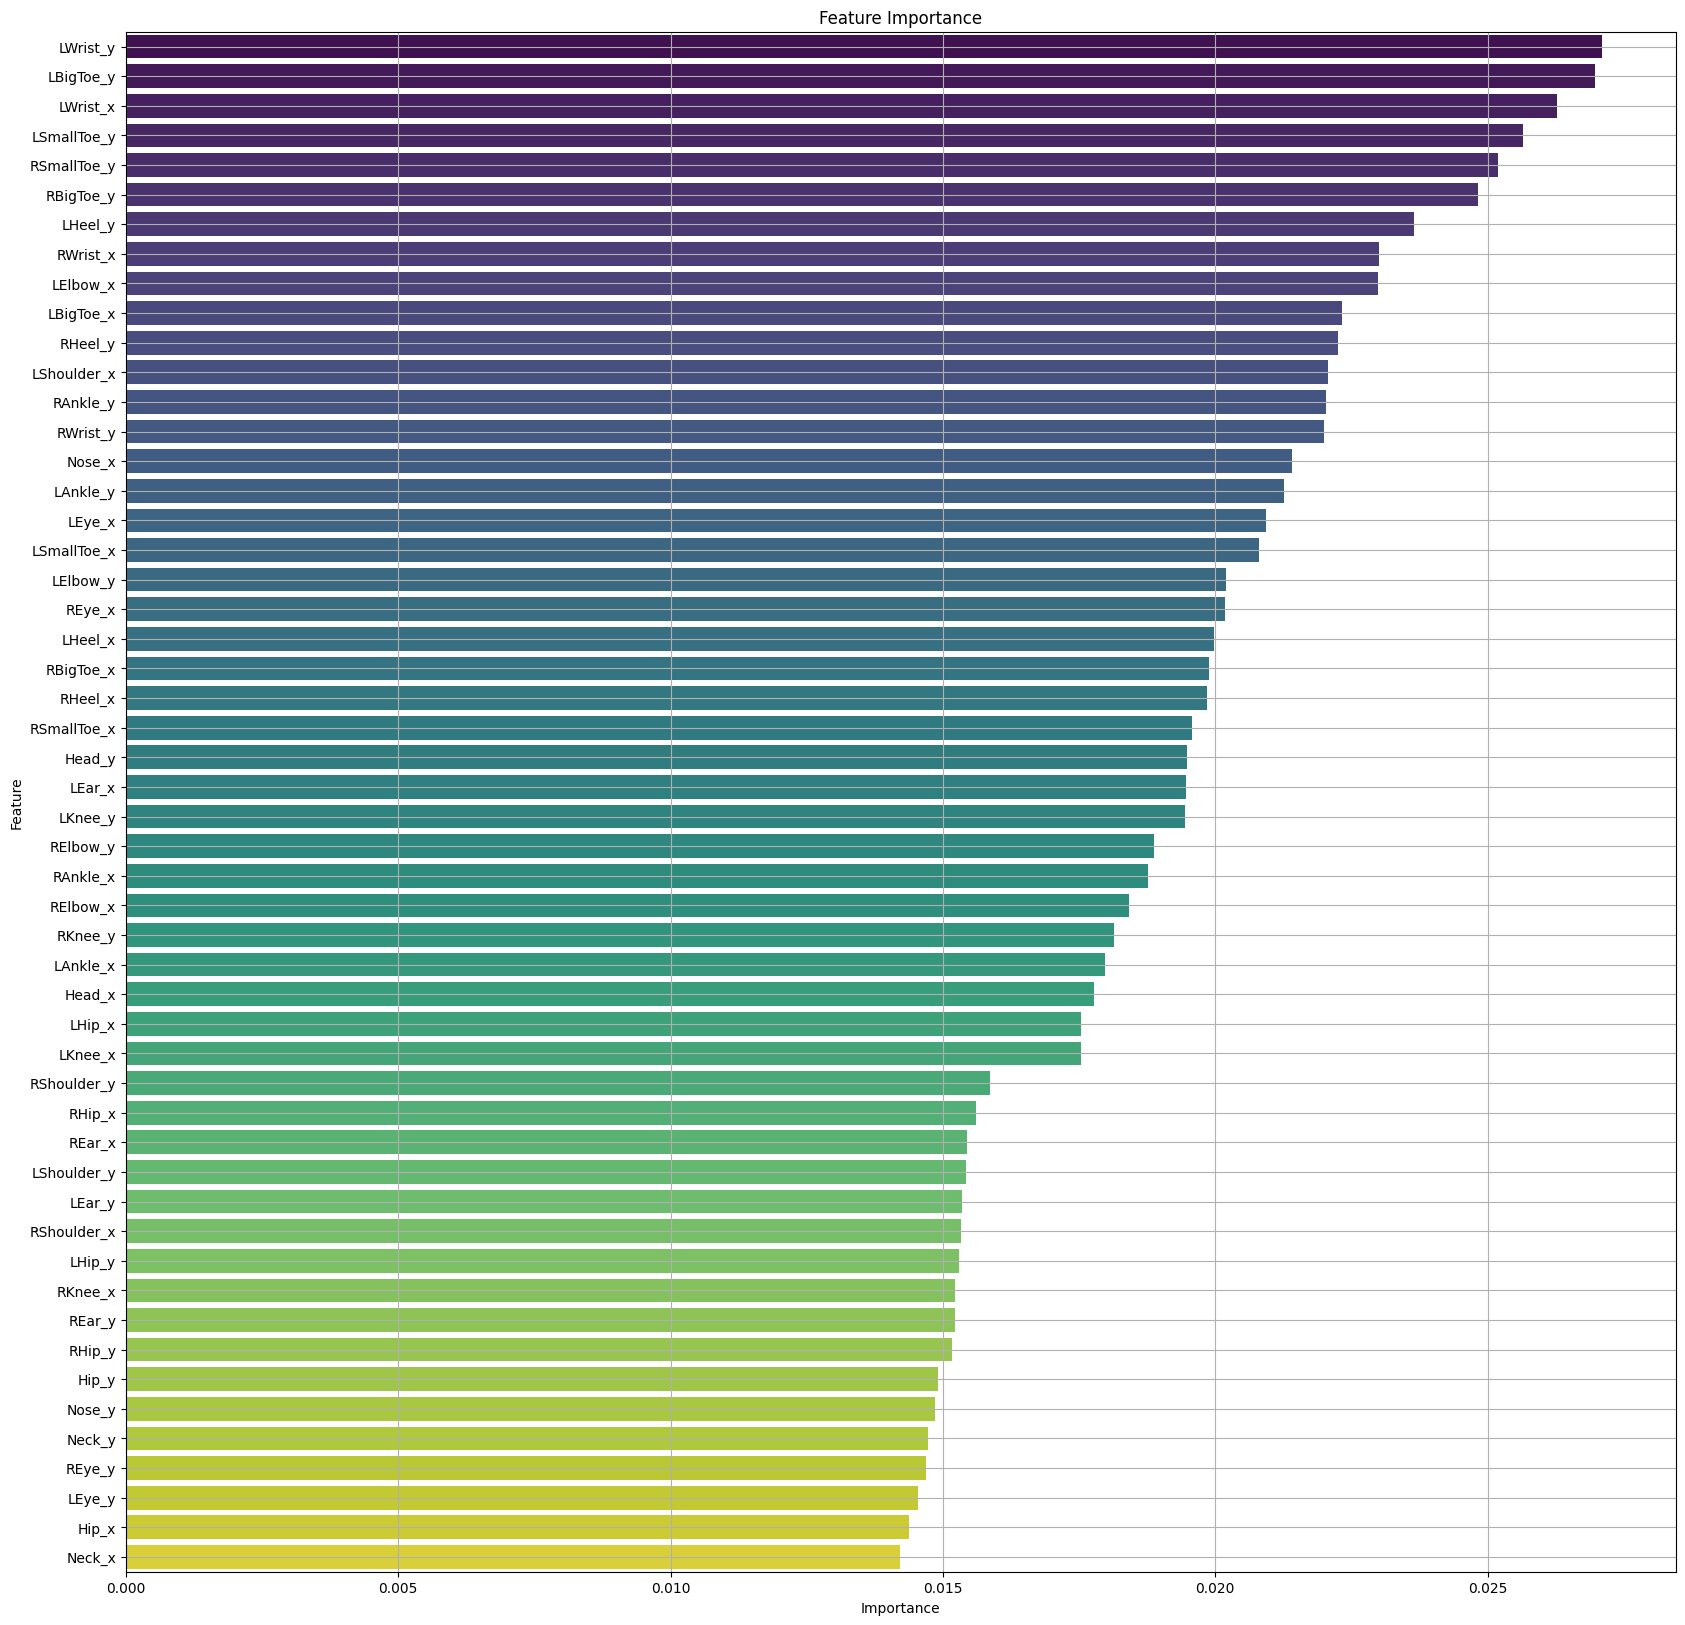


=== Feature Importance ===
        Feature  Importance
19     LWrist_y    0.027102
41    LBigToe_y    0.026977
18     LWrist_x    0.026278
45  LSmallToe_y    0.025641
47  RSmallToe_y    0.025190
43    RBigToe_y    0.024817
49      LHeel_y    0.023654
20     RWrist_x    0.023012
14     LElbow_x    0.022992
40    LBigToe_x    0.022319
51      RHeel_y    0.022253
10  LShoulder_x    0.022062
33     RAnkle_y    0.022026
21     RWrist_y    0.021991
0        Nose_x    0.021402
31     LAnkle_y    0.021267
2        LEye_x    0.020932
44  LSmallToe_x    0.020807
15     LElbow_y    0.020193
4        REye_x    0.020185


In [ ]:
importance = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

print("\n=== Feature Importance ===")
print(importance_df.head(20))

In [ ]:
# shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
# 특정 특성의 의존성 플롯
#shap.dependence_plot("특정_특성_이름", shap_values[0], X)


In [ ]:
# Force plot 생성
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X.iloc[0])


In [ ]:
!pip install lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# LIME 설명자 생성
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=np.unique(Y),
    mode='classification'
)